In [48]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.image import  load_img
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [7]:
# Define image size and other parameters
img_width, img_height = 256, 256
batchsize = 32
epochs = 4
num_of_class = 2

validation = keras.utils.image_dataset_from_directory(
    directory='Resources/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 16 files belonging to 2 classes.


In [9]:
test = keras. utils.image_dataset_from_directory(
    directory='Resources/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 624 files belonging to 2 classes.


In [10]:
train = keras. utils.image_dataset_from_directory(
    directory='Resources/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 5216 files belonging to 2 classes.


In [11]:
print(train.class_names)
print(validation.class_names)
print(test.class_names)

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


In [12]:
x_train = []
y_train = []

for feature, label in train:
    x_train.append(feature.numpy())
    y_train.append(label.numpy())

x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

In [13]:
x_val = []
y_val = []
    
for feature, label in validation:
    x_val.append(feature.numpy())
    y_val.append(label.numpy())

x_val = np.concatenate(x_val, axis=0)

y_val = np.concatenate(y_val, axis=0)

In [14]:
x_test = []
y_test = []

for feature, label in test:
    x_test.append(feature.numpy())
    y_test.append(label.numpy())

x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [15]:
# check the shapes of 'x_train' and 'y_train':
print("Shape of 'x_train':", x_train.shape)
print("Shape of 'y_train':", y_train.shape)
print("Shape of 'x_val':", x_val.shape)
print("Shape of 'y_val':", y_val.shape)
print("Shape of 'x_test':", x_test.shape)
print("Shape of 'y_test':", y_test.shape)

Shape of 'x_train': (5216, 256, 256, 3)
Shape of 'y_train': (5216, 2)
Shape of 'x_val': (16, 256, 256, 3)
Shape of 'y_val': (16, 2)
Shape of 'x_test': (624, 256, 256, 3)
Shape of 'y_test': (624, 2)


In [16]:
x_train=x_train/255
x_val=x_val/255
x_test=x_test/255

In [32]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [31]:
x_train_pneumonia = []
x_train_normal = []

for i in range(len(x_train)):
    if y_train[i][0] == 0:
        x_train_pneumonia.append(list(x_train[i]))
    else:
        x_train_normal.append(list(x_train[i]))

x_train_pneumonia = np.array(x_train_pneumonia)
x_train_normal = np.array(x_train_normal)

In [35]:
print(np.shape(x_train_pneumonia))

(3875, 256, 256, 3)


In [38]:
x_train_pneumonia[0][0]

array([[0.22990195, 0.22990195, 0.22990195],
       [0.24221814, 0.24221814, 0.24221814],
       [0.22435279, 0.22435279, 0.22435279],
       [0.22352941, 0.22352941, 0.22352941],
       [0.21960784, 0.21960784, 0.21960784],
       [0.21960784, 0.21960784, 0.21960784],
       [0.21568628, 0.21568628, 0.21568628],
       [0.22291666, 0.22291666, 0.22291666],
       [0.22351983, 0.22351983, 0.22351983],
       [0.21804343, 0.21804343, 0.21804343],
       [0.21194853, 0.21194853, 0.21194853],
       [0.21849915, 0.21849915, 0.21849915],
       [0.2105641 , 0.2105641 , 0.2105641 ],
       [0.22046569, 0.22046569, 0.22046569],
       [0.22487937, 0.22487937, 0.22487937],
       [0.23845933, 0.23845933, 0.23845933],
       [0.23482499, 0.23482499, 0.23482499],
       [0.23921569, 0.23921569, 0.23921569],
       [0.24313726, 0.24313726, 0.24313726],
       [0.24230431, 0.24230431, 0.24230431],
       [0.2465131 , 0.2465131 , 0.2465131 ],
       [0.25006127, 0.25006127, 0.25006127],
       [0.

In [36]:
print(np.shape(x_train_normal))

(1341, 256, 256, 3)


In [41]:
datagen_pneumonia = ImageDataGenerator(
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip = True
)

datagen_pneumonia.fit(x_train_pneumonia)
batch_size = np.shape(x_train_pneumonia)[0]
x_train_pneumonia_1 = next(datagen_pneumonia.flow(x_train_pneumonia, batch_size=batch_size))
x_train_pneumonia_expanded = np.concatenate((np.array(x_train_pneumonia), np.array(x_train_pneumonia_1)), axis=0)

x_train_pneumonia = x_train_pneumonia_expanded

datagen_pneumonia.fit(x_train_pneumonia)
batch_size = np.shape(x_train_pneumonia)[0]
x_train_pneumonia_1 = next(datagen_pneumonia.flow(x_train_pneumonia, batch_size=batch_size))
x_train_pneumonia_expanded = np.concatenate((np.array(x_train_pneumonia), np.array(x_train_pneumonia_1)), axis=0)

In [42]:
print(np.shape(x_train_pneumonia_expanded))

(15500, 256, 256, 3)


In [43]:
datagen_normal = ImageDataGenerator(
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip = True
)

datagen_normal.fit(x_train_normal)

batch_size = np.shape(x_train_normal)[0]
x_train_normal_1 = next(datagen_normal.flow(x_train_normal, batch_size=batch_size))
x_train_normal_expanded = np.concatenate((np.array(x_train_normal), np.array(x_train_normal_1)), axis=0)

x_train_normal = x_train_normal_1

for i in range(3):
    datagen_normal.fit(x_train_normal)
    x_train_normal_1 = next(datagen_normal.flow(x_train_normal, batch_size=batch_size))
    x_train_normal_expanded = np.concatenate((x_train_normal_expanded, np.array(x_train_normal_1)), axis=0)

    x_train_normal = x_train_normal_1
    
x_train_normal = x_train_normal[:1045]

datagen_normal.fit(x_train_normal)
batch_size = np.shape(x_train_normal)[0]
x_train_normal_1 = next(datagen_normal.flow(x_train_normal, batch_size=batch_size))
x_train_normal_expanded = np.concatenate((x_train_normal_expanded, np.array(x_train_normal_1)), axis=0)

x_train_normal = x_train_normal_expanded

datagen_normal.fit(x_train_normal)
batch_size = np.shape(x_train_normal)[0]
x_train_normal_1 = next(datagen_normal.flow(x_train_normal, batch_size=batch_size))
x_train_normal_expanded = np.concatenate((x_train_normal_expanded, np.array(x_train_normal_1)), axis=0)

In [44]:
print(np.shape(x_train_normal_expanded))

(15500, 256, 256, 3)


In [45]:
x_train = np.concatenate((x_train_pneumonia_expanded, x_train_normal_expanded), axis=0)

y_train = []
for i in range(len(x_train_pneumonia_expanded)):
    y_train.append(0)
for i in range(len(x_train_normal_expanded)):
    y_train.append(1)
y_train = np.array(y_train)

In [58]:
print(np.shape(y_train))

(31000,)


In [ ]:
# # Create the dictionary
# pneumonia_dict = {
#     'x_train': x_train,
#     'x_test': x_test,
#     'y_train': y_train,
#     'y_test': y_test,
#     'x_val': x_val,
#     'y_val': y_val
# }



In [56]:
# # Store the dictionary in a pickle file
# with open('Resources/pneumonia_dict.pkl', 'wb') as file:
#     pickle.dump(pneumonia_dict, file)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,909,378 (72.13 MB)

 Trainable params: 11,274,114 (43.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

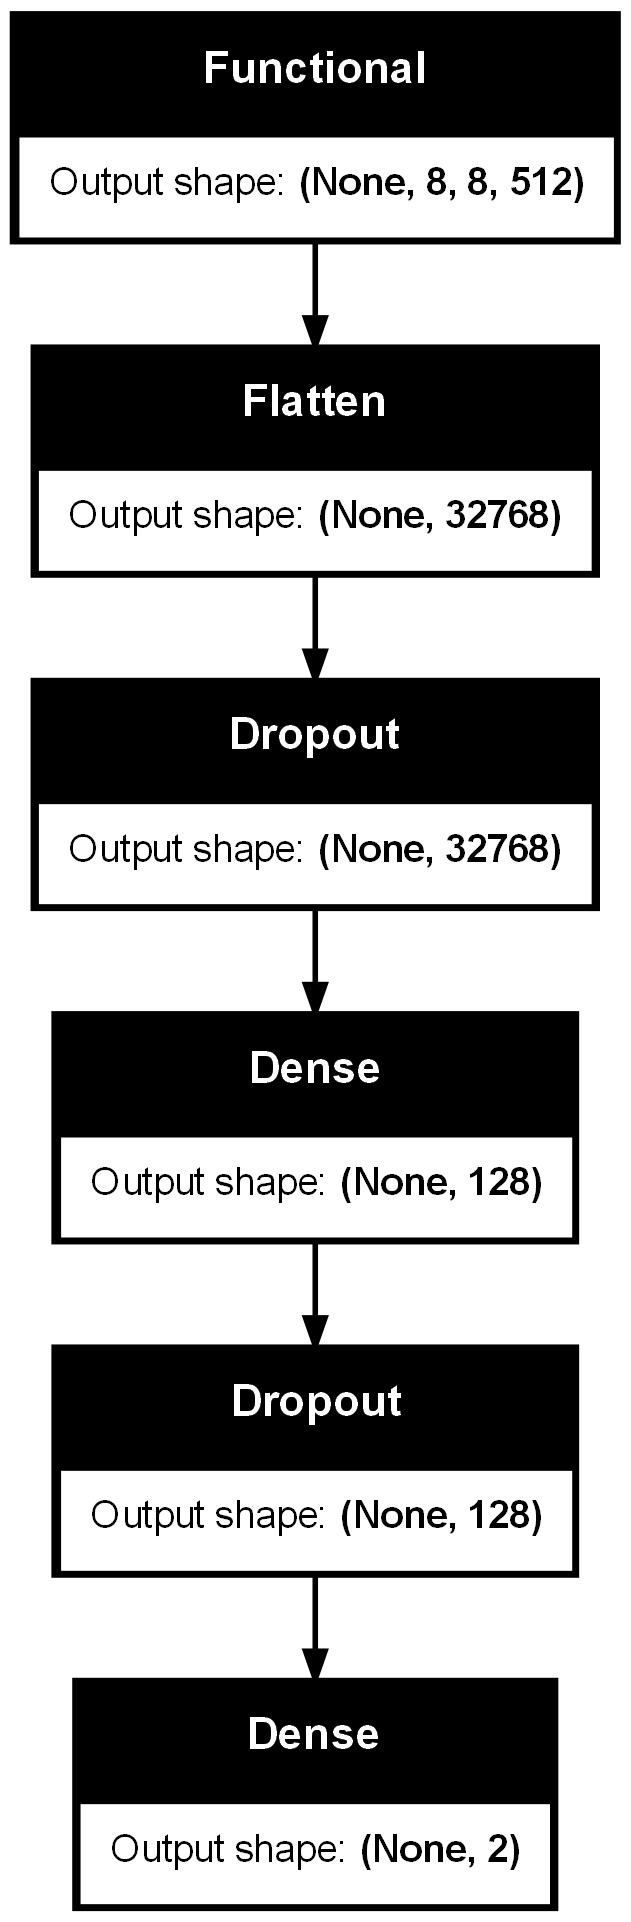

In [65]:
# We use transfer learning with VGG16 as the base model
def CNN_Model():
    base_model = VGG16(weights='imagenet', include_top = False, input_shape=(img_width, img_height, 3))
    # Freeze the base model
    for layer in base_model.layers:
        layer.trainable = False

    for i in range(3):
        base_model.layers[-2-i].trainable = True

    CNN = Sequential()
    CNN.add(Input(shape=(img_width, img_height,3)))
    CNN.add(base_model)
    CNN.add(Flatten())
    CNN.add(Dropout(0.3))
    CNN.add(Dense(128, activation='relu', kernel_regularizer=l2(0.05)))
    CNN.add(Dropout(0.2))
    CNN.add(Dense(2, activation='sigmoid'))
    
    return CNN

# Training The CNN
model = CNN_Model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()  
# Visualized Layers of CNN
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
hist = model.fit(x_train, y_train, epochs= 6, validation_data= (x_val, y_val))
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")